In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

In [42]:
# サンプリング周波数
sampling_rate = 100

# グラフの範囲
fig_range = (0, 5)

# グラフの設定
fontsize_title = 25
fontsize_label = 20

# 平滑化の設定
window = 20

fs = 400

In [43]:
# CSVファイルを読み込む
csv_file_path = "data_walk.csv"
raw_data = pd.read_csv(csv_file_path)

# normを計算
raw_data['norm'] = (raw_data['x']**2 + raw_data['y']**2 + raw_data['z']**2)**0.5

(24000.0, 64000.0)

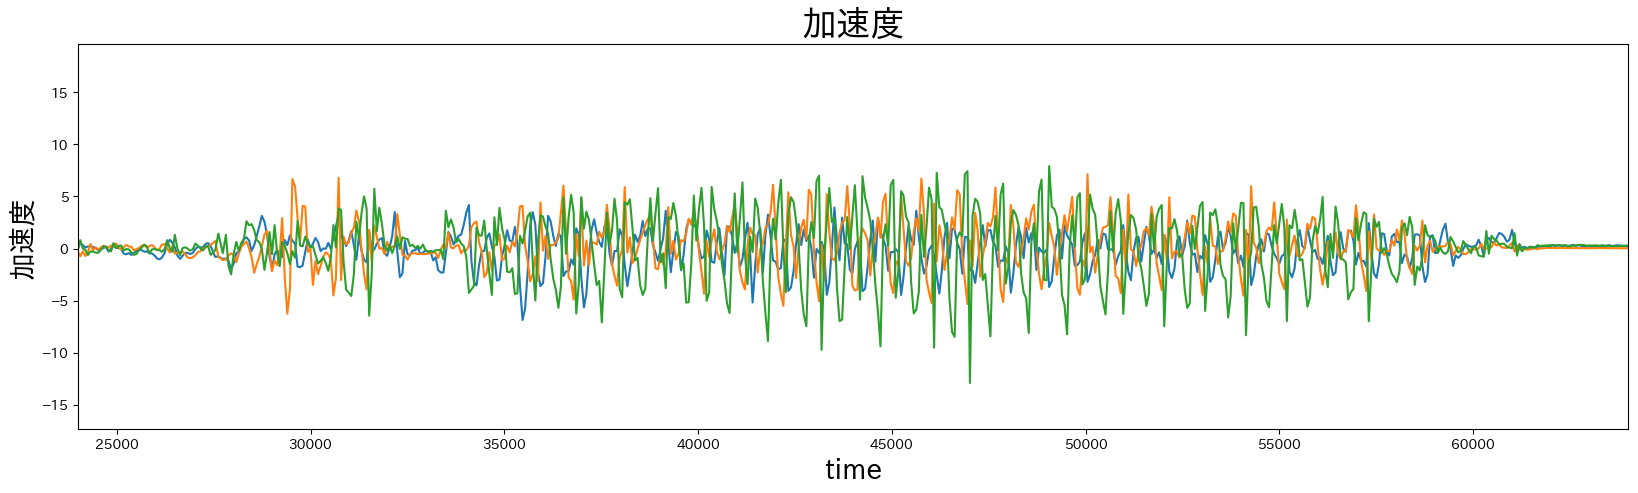

In [51]:
# 折線グラフを描画
fig = plt.figure()
plt.title('加速度', fontsize=fontsize_title)
plt.plot(raw_data['time'], raw_data['x'], label='x')
plt.plot(raw_data['time'], raw_data['y'], label='y')
plt.plot(raw_data['time'], raw_data['z'], label='z')
plt.xlabel('time', fontsize=fontsize_label)
plt.ylabel('加速度', fontsize=fontsize_label)
fig.set_size_inches(20, 5)
plt.xlim(24000, 64000)

In [6]:
# 平滑化する関数
def smooth(x):
    dx = np.array([0]*window)
    for i in range(len(x[window:])):
        avg = sum(x[i - int(window/2): i+1 + int(window/2)]) / window
        dx = np.append(dx, avg)

    return dx

[ 471  562  651  704  761  825  875 1148 1202 1294 1438 1492]


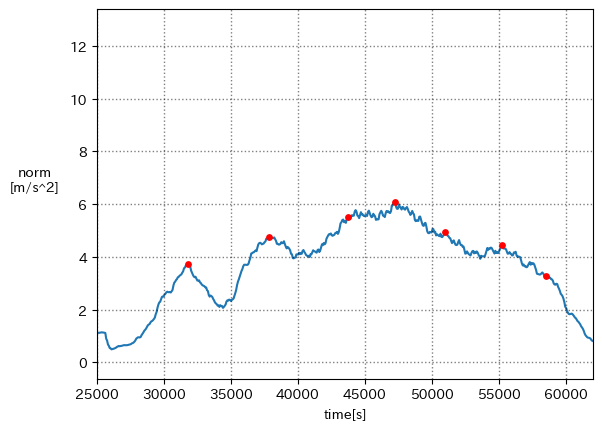

In [7]:
# window=10 の移動平均を計算 ローパスフィルター
low_norm = raw_data['norm'].rolling(window=40).mean()

# 　折線グラフを描画
plt.plot(raw_data['time'], low_norm, zorder=1)
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 8)

# ピークを検出
peek, _ = signal.find_peaks(low_norm, distance=50, height=1.5)
print(peek)
# 赤点を描画
plt.scatter(raw_data['time'][peek], low_norm[peek], s=15, color='red', zorder=2)
plt.xlim(25000,62000)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (1893,) and (1913,)

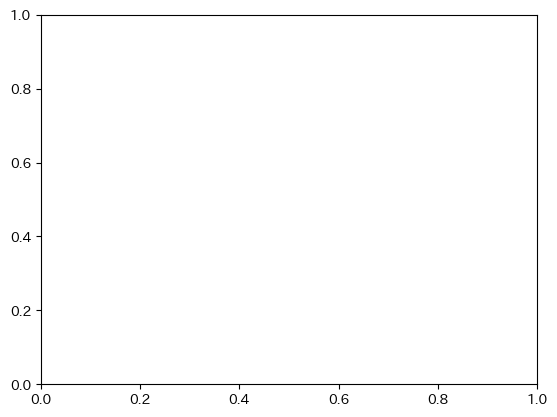

In [8]:
low_norm = smooth(raw_data['norm'])

# 　折線グラフを描画
plt.plot(raw_data['time'][:-20], low_norm, zorder=1)
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 8)

# ピークを検出
peek, _ = signal.find_peaks(low_norm, distance=50, height=1.5)
print(peek)
# 赤点を描画
plt.scatter(raw_data['time'][peek], low_norm[peek], s=15, color='red', zorder=2)
plt.xlim(25000,62000)
plt.show()

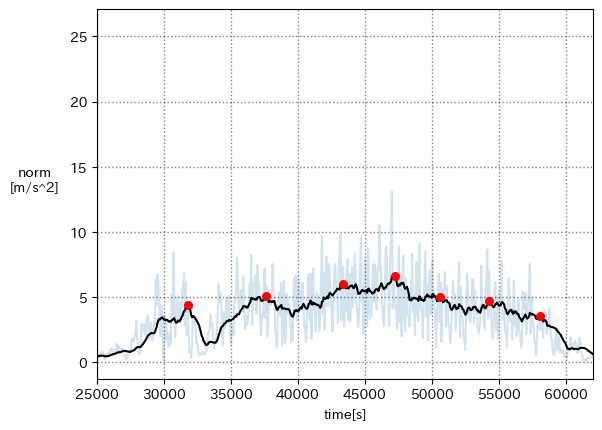

In [44]:
# window=10 の移動平均を計算 ローパスフィルター
low_norm_1 = smooth(raw_data['norm'])
low_norm_2 = raw_data['norm'].rolling(window=20).mean()

# 　折線グラフを描画
plt.plot(raw_data['time'], raw_data['norm'], zorder=1, label="norm", alpha=0.2)
# plt.plot(raw_data['time'][10:-10], low_norm_1, zorder=1, label="自作関数")
plt.plot(raw_data['time'], low_norm_2, zorder=1, label="pandas.rolling()", color='black')
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 7)

# ピークを検出
peek, _ = signal.find_peaks(low_norm_2, distance=50, height=1.5)
# 赤点を描画
# plt.scatter(raw_data['time'][peek], low_norm_1[peek], s=15, color='red', zorder=2)
plt.scatter(raw_data['time'][peek], low_norm_2[peek], s=30, color='red', zorder=2)
plt.xlim(25000,62000)
# plt.legend()
plt.show()


In [45]:
# 時間、X軸、Y軸、Z軸のデータを取得
start_time = raw_data['time'][0]
relative_time = raw_data['time'] - start_time - 0.4
raw_data['v_norm'] = np.cumsum(raw_data['norm']) / fs
raw_data['smooth'] = raw_data['v_norm'].rolling(window=10).mean()
raw_data['v_norm_integral'] = np.cumsum(raw_data['v_norm']) / fs
raw_data['smooth_integral'] = raw_data['v_norm_integral'].rolling(window=10).mean()
raw_data['smooth_norm'] = raw_data['norm'].rolling(window=10).mean()


/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_75504/1167890636.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)


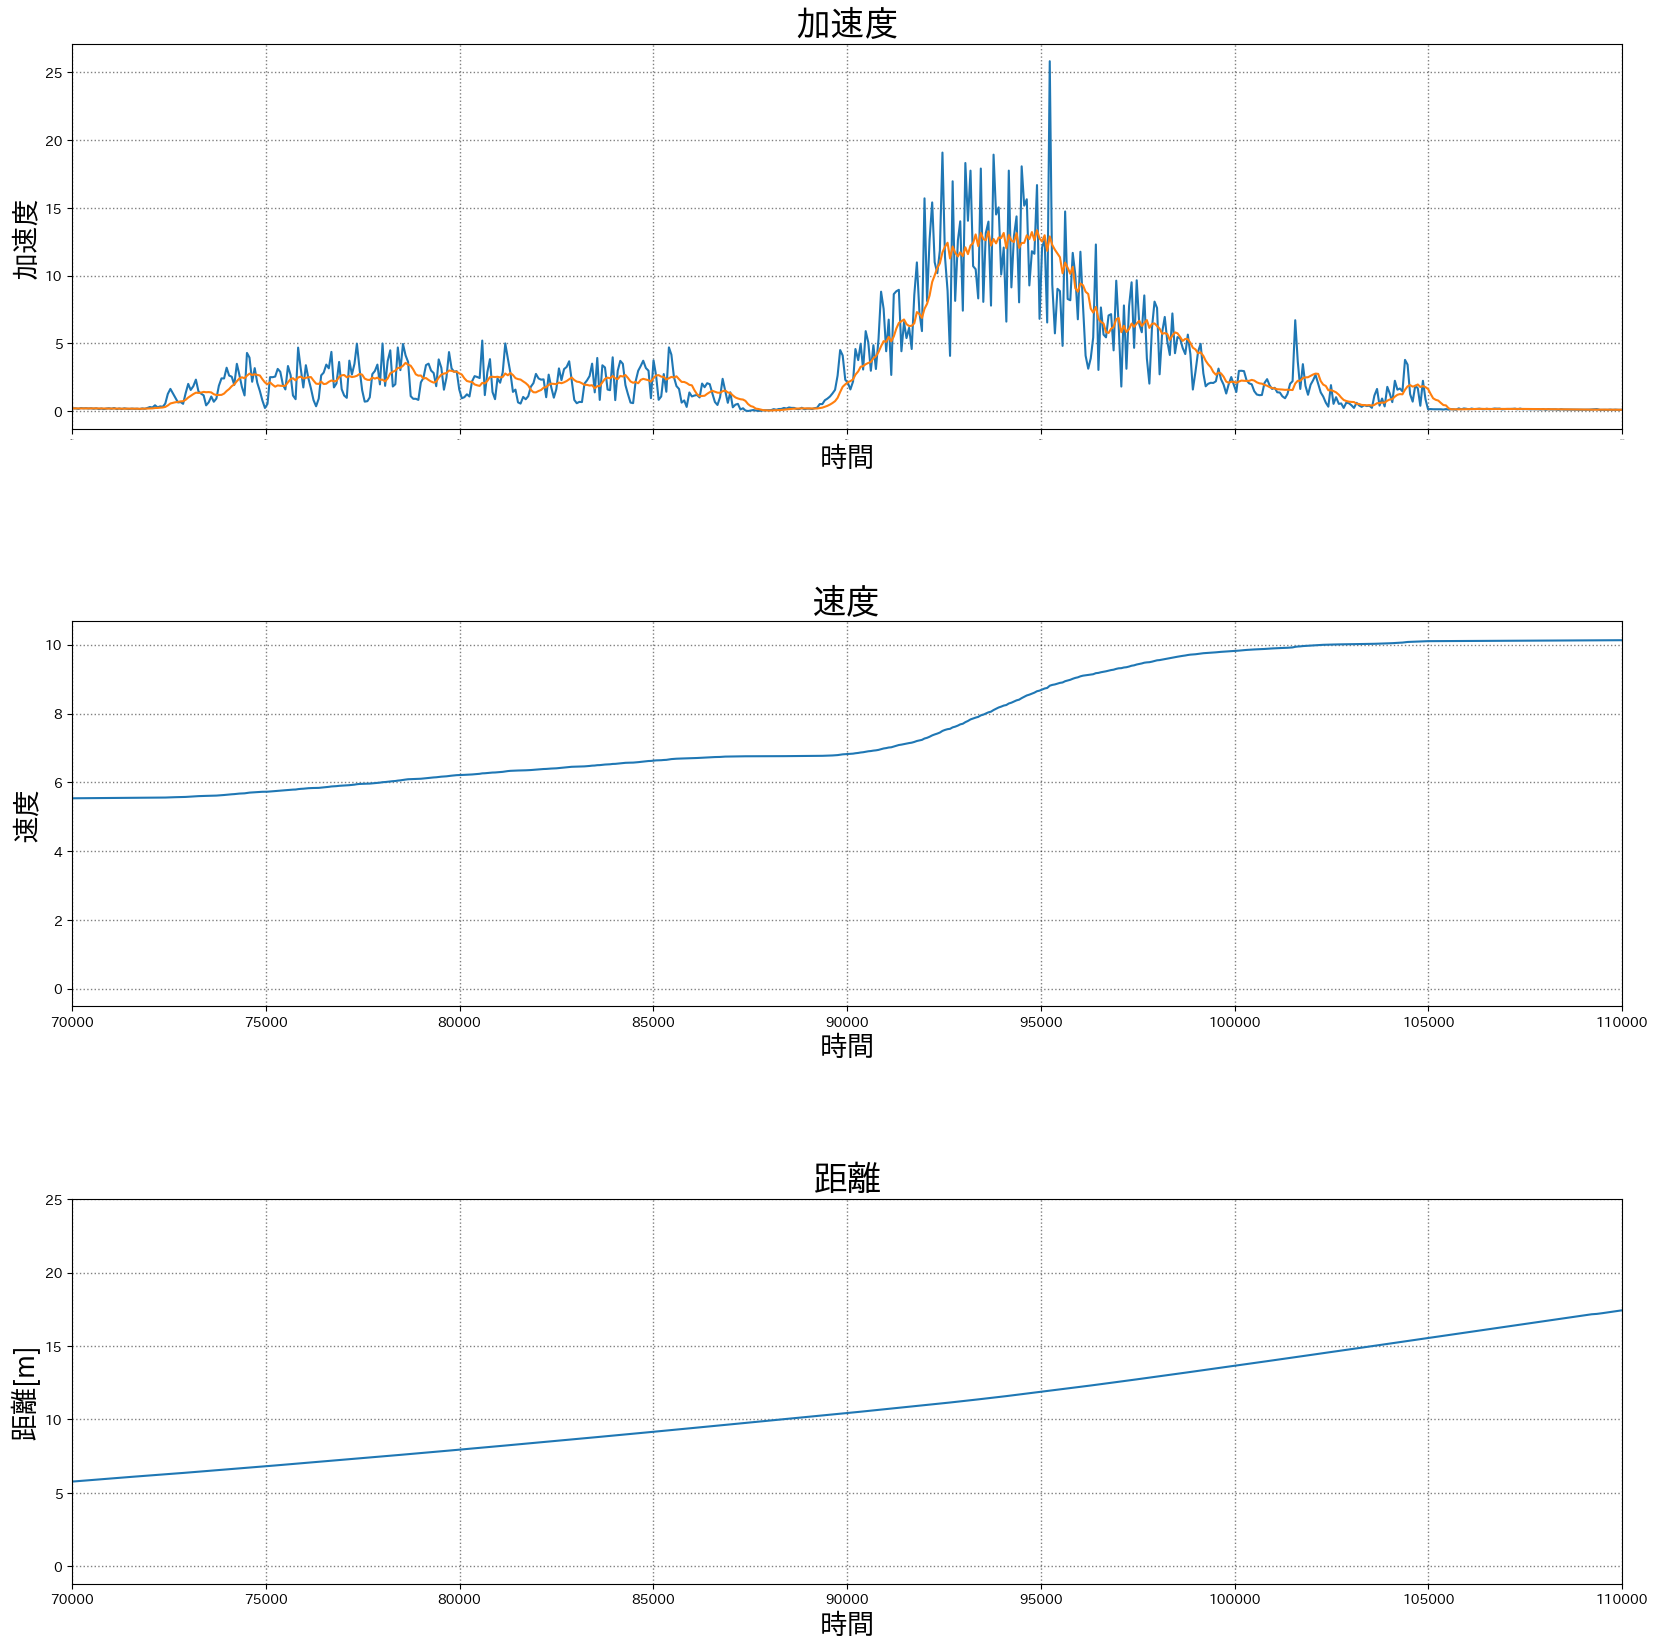

In [52]:
# グラフの描画
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(3, 1, 1)
plt.subplots_adjust(hspace=0.5)
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax1.set_title('加速度', fontdict={'size': fontsize_title})
ax1.set_xlabel('時間', fontdict={'size': fontsize_label})
ax1.set_ylabel('加速度', fontdict={'size': fontsize_label})
ax1.set_xlim(70000, 110000)

ax2 = fig.add_subplot(3, 1, 2)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title('速度', fontdict={'size': fontsize_title})
ax2.set_xlabel('時間', fontdict={'size': fontsize_label})
ax2.set_ylabel('速度', fontdict={'size': fontsize_label})
ax2.set_xlim(70000, 110000)

ax3 = fig.add_subplot(3, 1, 3)
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax3.set_title('距離', fontdict={'size': fontsize_title})
ax3.set_xlabel('時間', fontdict={'size': fontsize_label})
ax3.set_ylabel('距離[m]', fontdict={'size': fontsize_label})
ax3.set_xlim(70000, 110000)

# データをプロット
ax1.plot(relative_time, raw_data['norm'], label="a")
ax1.plot(relative_time, raw_data['smooth_norm'], label="a'")
ax2.plot(relative_time, raw_data['v_norm'], label="v")
# ax2.plot(relative_time, raw_data['smooth'], label="v'")
ax3.plot(relative_time, raw_data['v_norm_integral'], label="p")
# ax3.plot(relative_time, raw_data['smooth_integral'], label="p'")

# 範囲を指定
# ax1.set_xlim(*fig_range)
# ax2.set_xlim(*fig_range)
# ax3.set_xlim(*fig_range)

# メモリの設定
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)
# グラフを表示
plt.show()

In [9]:
# csvファイルの読み込み
csv_file_path = "A20.csv"
raw_data_A20 = pd.read_csv(csv_file_path)
print(raw_data_A20)

       time         x         y         z
0       329  0.001604  0.000000  0.000993
1       331  0.000993  0.000000  0.000993
2       333  0.001604  0.000611  0.000993
3       390  0.000993 -0.000611  0.001604
4       446  0.001604 -0.000611  0.000993
...     ...       ...       ...       ...
1343  89716  0.001374 -0.000153 -0.000687
1344  89783  0.001374 -0.000153 -0.000076
1345  89849  0.001985 -0.000764 -0.000687
1346  89916  0.002596 -0.000153 -0.000076
1347  89980  0.002596 -0.000764 -0.000076

[1348 rows x 4 columns]


(30000.0, 60000.0)

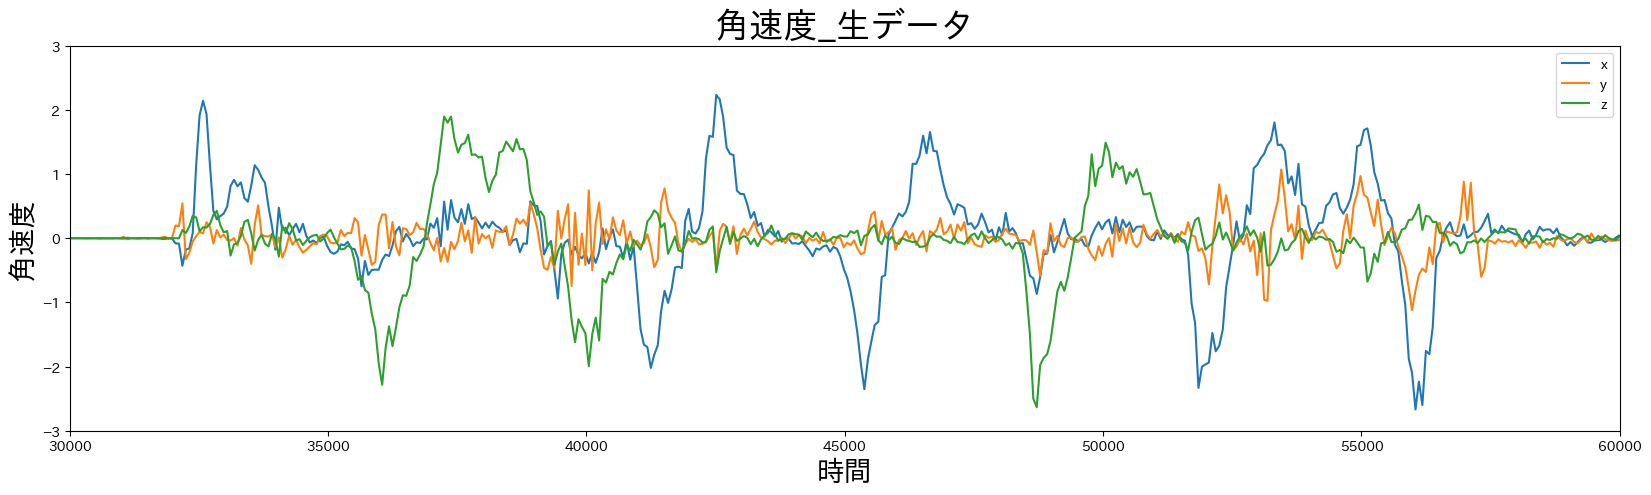

In [53]:
# 折線グラフを描画
fig = plt.figure()
plt.title('角速度_生データ', fontsize=25)
plt.plot(raw_data_A20['time'], raw_data_A20['x'], label='x')
plt.plot(raw_data_A20['time'], raw_data_A20['y'], label='y')
plt.plot(raw_data_A20['time'], raw_data_A20['z'], label='z')
plt.xlabel('時間', fontsize=20)
plt.ylabel('角速度', fontsize=20)
plt.ylim(-3, 3)
fig.set_size_inches(20, 5)
plt.legend()
plt.xlim(30000, 60000)

In [12]:
# 時間、X軸、Y軸、Z軸のデータを取得
raw_data_A20['norm'] = (raw_data_A20['x']**2 + raw_data_A20['y']**2 + raw_data_A20['z']**2)**0.5
start_time = raw_data_A20['time'][0]
relative_time = raw_data_A20['time'] - start_time - 0.4
raw_data_A20['v_norm'] = np.cumsum(raw_data_A20['norm']) / fs
raw_data_A20['smooth'] = raw_data_A20['v_norm'].rolling(window=10).mean()
raw_data_A20['v_norm_integral'] = np.cumsum(raw_data_A20['v_norm']) / fs
raw_data_A20['smooth_integral'] = raw_data_A20['v_norm_integral'].rolling(window=10).mean()
raw_data_A20['smooth_norm'] = raw_data_A20['norm'].rolling(window=10).mean()

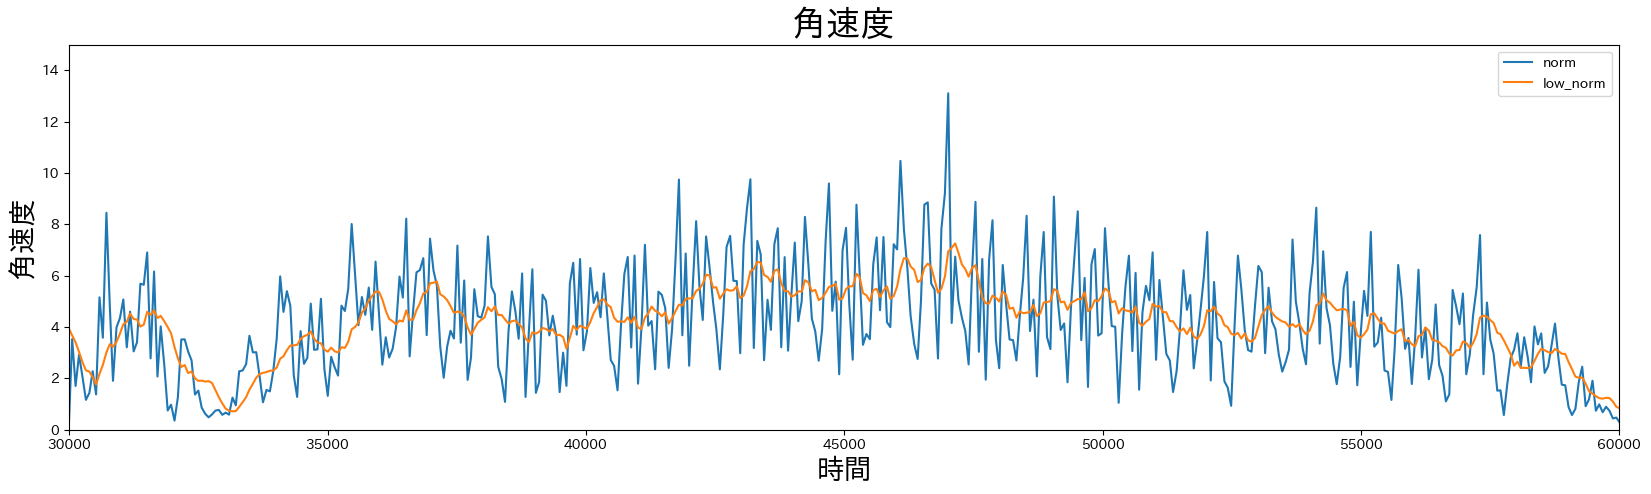

In [56]:
df = pd.read_csv(csv_file_path)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
df['low_norm'] = df['norm'].rolling(window=10).mean()
fig = plt.figure()
plt.title('角速度', fontsize=25)
plt.plot(df['time'], df['norm'], zorder=1,label='norm')
plt.plot(df['time'], df['low_norm'], zorder=1,label='low_norm')
plt.xlabel('時間', fontsize=20)
plt.ylabel('角速度', fontsize=20)
plt.ylim(0, 15)
fig.set_size_inches(20, 5)
plt.xlim(30000, 60000)
plt.legend()
plt.show()

/var/folders/qx/g75h6sns4slc8l4sb8lsy3l00000gn/T/ipykernel_75504/1158520860.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)


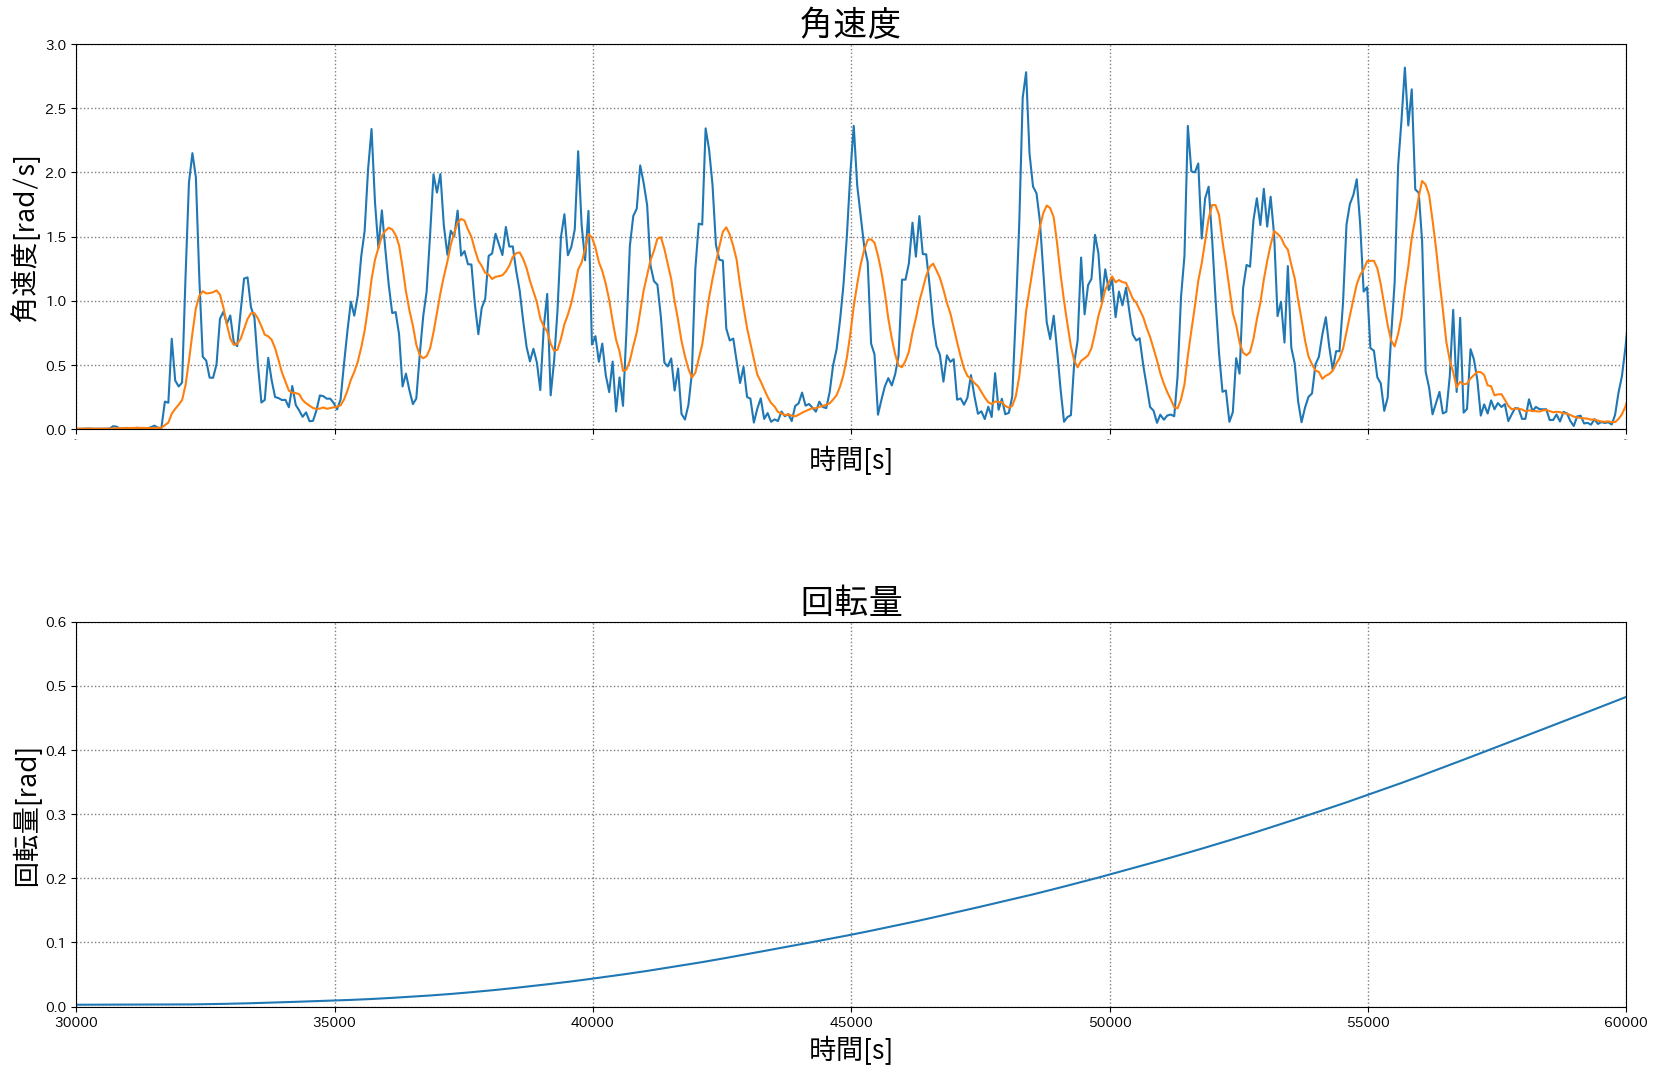

In [34]:
# グラフの描画
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(3 , 1 ,2)
plt.subplots_adjust(hspace=0.5)
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax1.set_title('角速度', fontdict={'size': fontsize_title})
ax1.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax1.set_ylabel('角速度[rad/s]', fontdict={'size': fontsize_label})
ax1.set_ylim(0, 3)
ax1.set_xlim(30000, 60000)

ax2 = fig.add_subplot(3, 1, 3)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title('回転量', fontdict={'size': fontsize_title})
ax2.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax2.set_ylabel('回転量[rad]', fontdict={'size': fontsize_label})
ax2.set_ylim(0, 0.6)
ax2.set_xlim(30000, 60000)

# データをプロット
ax1.plot(relative_time, raw_data_A20['norm'], label="a")
ax1.plot(relative_time, raw_data_A20['smooth_norm'], label="a'")
# ax2.plot(relative_time, raw_data_A20['v_norm'], label="v")
# ax2.plot(relative_time, raw_data['smooth'], label="v'")
ax2.plot(relative_time, raw_data_A20['v_norm_integral'], label="p")
# ax3.plot(relative_time, raw_data['smooth_integral'], label="p'")

# メモリの設定
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)
# グラフを表示
plt.show()